## Chapter 12. 데이터 그룹화하기

In [1]:
# 버전 안내
import pandas as pd
print(f'교재 권장 버전: Pandas 2.2.2')
print(f'현재 실행 버전: Pandas {pd.__version__}')

교재 권장 버전: Pandas 2.2.2
현재 실행 버전: Pandas 2.2.2


### 12.1. groupby 함수로 열 가공하기

#### 12.1.1. groupby 함수가 필요한 이유

- 원시 데이터는 다양한 **특성**(열) 보유  
- 연산은 **특성이 동일한 그룹끼리** 이루어져야 할 때가 많음
- 여러 그룹이 섞여 있으면 단순 함수로는 **정확한 계산 불가**
  → 그래서 **groupby가 필수**

#### 12.1.2. 그룹 내에서 함수 적용하기(groupby)

<img src=https://i.postimg.cc/T2WBm0DY/image.png, width=600>

⭐ 판다스 `groupby`

그룹 내에서 함수를 적용하게 해주는 함수

<br>

⭐ `groupby` 함수의 주요 매개변수와 인수, 기본값

```python
df.groupby(by=None, level=None, as_index=True, sort=True, group_keys=True)
```

- **by**: 그룹을 나누는 기준을 지정한다. 주로 열을 지정하며 복수라면 리스트로 입력한다.

- **level**: 인덱스로 그룹을 나눌 때, 기준 레벨을 지정한다.

- **as_index**: groupby 함수로 집계할 때 그룹이 인덱스가 될지 지정한다.

- **sort**: 그룹의 키로 정렬할지 지정한다.

- **group_keys**: groupby와 apply를 함께 사용할 때, 그룹의 키를 인덱스에 추가할지 지정한다.

<br>


[그림 12-4] groupby 함수를 적용할 때 지정해야 할 세 가지

<img src=https://i.postimg.cc/BnhmRPKj/image.png, width=600>

In [2]:
# 코드 12-1. groupby 함수 실습 예제 코드
import pandas as pd
data1 = {'반': ['A', 'B', 'A', 'B', 'B', 'A'],
         '점수': [88, 30, 78, 99, 62, 85]}
df = pd.DataFrame(data1)
df

,반,점수
0,A,88
1,B,30
2,A,78
3,B,99
4,B,62
5,A,85


In [3]:
# 코드 12-2. df에서 오름차순으로 전체 등수 구하기


In [4]:
# 코드 12-3. df에서 오름차순으로 반 등수 구하기


#### 12.1.3. groupby 함수로 순위 매기기(rank)

- `groupby` + `rank`: 그룹별 순위 계산 지원

In [5]:
# 코드 12-4. df에서 내림차순으로 반 등수 구하기


In [6]:
# 코드 12-5. 코드 12-4의 결과를 df에 반등수 열로 생성하기



### 엑셀 예제 16. 동명이인 구분하기

📌 동명이인 처리 방식: 생일 기준으로 넘버링

- 가장 생일이 빠른 사람은 원래 이름 유지

- 이후는 김판다2·김판다3… 형태로 부여


In [7]:
# 코드 12-6. 동명이인 엑셀 파일에서 데이터 프레임 불러오기
import pandas as pd
pd.options.display.max_rows = 6 # 6행까지만 출력
url2 = 'https://github.com/panda-kim/book1/blob/main/18name.xlsx?raw=true'
df_name = pd.read_excel(url2)
df_name

,이름,생년월일,주소
0,한서준,1983-10-13,경상북도 포항시 남구 정동길207번길
1,주도완,1987-04-13,경상남도 산청군 신등가회로218번길
2,한서준,1998-03-13,울산광역시 울주군 월부길
...,...,...,...
19816,홍무열,1977-01-04,경상북도 칠곡군 어로4길
19817,차도건,1992-03-10,경기도 남양주시 경춘북로546번길
19818,백동범,1992-08-25,제주특별자치도 제주시 삼무로7길


In [8]:
# 코드 12-7. 동명이인 인원수 파악하기


In [9]:
# 코드 12-8. 이름과 생년월일이 모두 같은 사람 파악하기


In [10]:
# 코드 12-9. 이름으로 그룹을 나누어 생일 순으로 순위 매기기


In [11]:
# 코드 12-10. 코드 12-9의 결과를 정수로 변환하고, 문자열로 변환해 변수 s로 지정



In [12]:
# 코드 12-11. s의 '1'을 빈 문자열('')로 치환한 후 이름 열에 더하기


# 그 결과로 이름 열을 수정하기



In [13]:
# 코드 12-12. 한서준 씨의 데이터로 동명이인 처리 여부 확인


In [14]:
# 코드 12-13. 결과를 엑셀 파일로 저장('ch12_name.xlsx')


#### 12.1.4. groupby 함수로 행 간의 연산하기(shift 외)

- `groupby` + `shift`: 그룹 내에서 데이터 이동

- `groupby` + `diff`: 그룹 내에서 행간의 차이 계산

- `groupby` + `pct_change`: 그룹 내에서 행간의 변동률 계산


In [15]:
# 코드 12-14. 그룹을 나누어 행 간의 연산 실습 예제 코드
import pandas as pd
pd.options.display.max_rows = 8 # 8행까지만 출력
data = [['2025-01-03', '판다전자', 10000],
        ['2025-01-03', '성심당', 2000],
        ['2025-01-04', '성심당', 1600],
        ['2025-01-04', '판다전자', 12000],
        ['2025-01-05', '판다전자', 15000],
        ['2025-01-05', '성심당', 2000],
        ['2025-01-06', '판다전자', 13500],
        ['2025-01-06', '성심당', 2400]]

df = pd.DataFrame(data, columns=['날짜', '종목', '종가'])
df

,날짜,종목,종가
0,2025-01-03,판다전자,10000
1,2025-01-03,성심당,2000
2,2025-01-04,성심당,1600
3,2025-01-04,판다전자,12000
4,2025-01-05,판다전자,15000
5,2025-01-05,성심당,2000
6,2025-01-06,판다전자,13500
7,2025-01-06,성심당,2400


In [16]:
# 코드 12-15. df에서 종목으로 그룹을 나누어 전일종가 열 생성하기



In [17]:
# 코드 12-16. df에서 종목으로 그룹을 나누어 전일 대비 등락 열 생성하기



In [18]:
# 코드 12-17. df에서 종목으로 그룹을 나누어 전일 대비 등락률 열 생성하기



#### 12.1.5. groupby 함수로 전후방 값으로 결측값 대체하기(ffill, bfill)

- `groupby` + `ffill`: 같은 그룹의 전방값으로 결측값 대체

- `groupby` + `bfill`: 같은 그룹의 후방값으로 결측값 대체


In [19]:
# 코드 12-18. 그룹을 나누어 결측값 대체하기 실습 예제 코드
import pandas as pd
data1 = [['2025-01-03', '판다전자', 10000, float('nan')],
         ['2025-01-03', '성심당', 2000, float('nan')],
         ['2025-01-04', '성심당', 1600, 1],
         ['2025-01-04', '판다전자', 12000, float('nan')],
         ['2025-01-05', '판다전자', 15000, 2],
         ['2025-01-05', '성심당', 2000, float('nan')],
         ['2025-01-06', '판다전자', 13500, float('nan')],
         ['2025-01-06', '성심당', 2400, float('nan')]]

df1 = pd.DataFrame(data1, columns=['날짜', '종목', '종가', '구매'])
df1

,날짜,종목,종가,구매
0,2025-01-03,판다전자,10000,NaN
1,2025-01-03,성심당,2000,NaN
2,2025-01-04,성심당,1600,1.0
3,2025-01-04,판다전자,12000,NaN
4,2025-01-05,판다전자,15000,2.0
5,2025-01-05,성심당,2000,NaN
6,2025-01-06,판다전자,13500,NaN
7,2025-01-06,성심당,2400,NaN


In [20]:
# 코드 12-19. df1에서 종목으로 그룹을 나누어 전방값으로 결측값 대체하기



In [21]:
# 코드 12-20. 보유 이후 주가만 필터링
# df1에서 보유 열에 값이 존재하는 경우를 필터링


In [22]:
# 코드 12-21. 첫 번째 구매 종목의 구매 이후 주가 추이
# df1에서 보유 열이 1인 경우를 필터링


In [23]:
# 코드 12-22. 두 번째 구매 종목의 구매 이후 주가 추이
# df1에서 보유 열이 2인 경우를 필터링


#### 12.1.6. groupby 함수로 누적 합 구하기(cumsum)

- `groupby` + `cumsum`: 그룹 내에서 누적합 계산

In [24]:
# 코드 12-23. 그룹을 나누어 누적 합 구하기 실습 예제 코드
import pandas as pd
data = [['2021-01-01', '김판다', 10000], ['2021-01-01', '강승주', 2000],
        ['2021-01-02', '김판다', 20000], ['2021-01-02', '강승주', 5000],
        ['2021-01-03', '강승주', 8000], ['2021-01-03', '김판다', 5000]]
df = pd.DataFrame(data, columns=['날짜', '이름', '입금액'])
df

,날짜,이름,입금액
0,2021-01-01,김판다,10000
1,2021-01-01,강승주,2000
2,2021-01-02,김판다,20000
3,2021-01-02,강승주,5000
4,2021-01-03,강승주,8000
5,2021-01-03,김판다,5000


In [25]:
# 코드 12-24. df에서 각 사람의 누적 입금액 구하기



In [26]:
# 코드 12-25. cumsum 함수로 그루퍼 생성 실습 예제 코드
pd.options.display.max_rows = 10 # 10행까지만 출력
data1 = [['07:35', 'A', 'Log_in', float('nan')],
         ['07:36', 'A', 'Buy', 2000.0],
         ['07:37', 'A', 'Log_out', float('nan')],
         ['10:30', 'B', 'Log_in', float('nan')],
         ['11:20', 'B', 'Buy', 4000.0],
         ['11:32', 'A', 'Log_in', float('nan')],
         ['11:34', 'B', 'Buy', 3000],
         ['11:35', 'B', 'Log_out', float('nan')],
         ['11:36', 'A', 'Buy', 5000.0],
         ['11:37', 'A', 'Log_out', float('nan')]]
df1 = pd.DataFrame(data1, columns=['시간', '회원코드', '로그', '구매금액'])
df1

,시간,회원코드,로그,구매금액
0,07:35,A,Log_in,NaN
1,07:36,A,Buy,2000.0
2,07:37,A,Log_out,NaN
3,10:30,B,Log_in,NaN
4,11:20,B,Buy,4000.0
5,11:32,A,Log_in,NaN
6,11:34,B,Buy,3000.0
7,11:35,B,Log_out,NaN
8,11:36,A,Buy,5000.0
9,11:37,A,Log_out,NaN


In [27]:
# 코드 12-26. df1에서 각 행이 로그인 데이터인지 불(bool)로 반환하는 로그인 열 생성



In [28]:
# 코드 12-27. df1에서 회원마다 로그인을 기준으로 그룹 나누기



In [29]:
# 코드 12-28. 회원코드 열(index)과 그룹 열(columns)로 나누어 구매금액의 합 집계
# pivot_table을 df1에 적용해 각 로그인마다 구매금액 집계


#### 12.1.7. groupby 함수로 순번 구하기(cumcount)

- `groupby` + `cumcount`: 그룹 내에서 순번 구하기

- `cumcount`는 반드시 그룹을 나누는 함수와 함께 사용


In [30]:
# 코드 12-29. cumcount 함수 실습 예제 코드
import pandas as pd
data = {'제품': ['A', 'B', 'B', 'A', 'C', 'A'],
        '판매량': [10, 20, 30, 40, 50, 60]}
df = pd.DataFrame(data)
df

,제품,판매량
0,A,10
1,B,20
2,B,30
3,A,40
4,C,50
5,A,60


In [31]:
# 코드 12-30. df에서 제품으로 그룹을 나누어 순번 생성하기



In [32]:
# 코드 12-31. 제품(index)과 순번(columns)로 그룹을 나누어 판매량을 피벗
# df에 pivot 함수 적용


- `groupby` + `cumcount` + `pivot` → 자주 사용되는 문자열 피벗 기법

<img src=https://i.postimg.cc/28Lj1nzL/image.png, width=600>

In [33]:
# 코드 12-32. 그룹을 나누지 않을 때 전체의 순번을 매기는 방법
import numpy as np
df['전체순번'] = range(0, len(df)) # 기본 파이썬의 방법
df['전체순번'] = np.arange(0, len(df)) # 넘파이의 방법
df['전체순번'] = pd.RangeIndex(0, len(df)) # 판다스의 방법
df

,제품,판매량,전체순번
0,A,10,0
1,B,20,1
2,B,30,2
3,A,40,3
4,C,50,4
5,A,60,5


### 엑셀 예제 17. 주식 ohlcv 데이터로 groupby 함수를 사용해 다양한 열 가공하기

---



In [34]:
# 코드 12-33. 주가 엑셀 파일에서 데이터 프레임 불러오기
import pandas as pd
pd.options.display.max_rows = 6 # 6행까지만 출력
url2 = 'https://github.com/panda-kim/book1/blob/main/19stock2.xlsx?raw=true'

# Code 열의 dtype을 문자열로 지정하기
df_stock = pd.read_excel(url2, dtype={'Code': 'str'})
df_stock

,Date,Name,Company,Code,Open,High,Low,Close,Volume
0,2020-01-02,SK하이닉스,SK Hynix,000660,96000,96200,94100,94700,2342070
1,2020-01-02,한화,Hanwha,000880,24950,25000,24300,24350,159418
2,2020-01-02,신세계,Shinsegae,004170,289500,296500,289500,292500,48510
...,...,...,...,...,...,...,...,...,...
15789,2023-12-28,현대백화점,Hyundai Department,069960,51300,52000,51100,51800,80416
15790,2023-12-28,KB금융,KB Financial,105560,52700,54100,52500,54100,1211536
15791,2023-12-28,삼성바이오로직스,Samsung Biologics,207940,729000,760000,727000,760000,132038


In [35]:
# 코드 12-34. 종목명의 유일 값 확인하기


In [36]:
# 코드 12-35. 10 거래일 기준의 등락률 생성하기
# Company 열을 기준으로 등락률을 생성해 Change_10d열 생성



In [37]:
# 코드 12-36. '10 거래일 기준의 등락률이 45% 이상이다' 조건문 생성하기

# 조건문으로 df_stock을 필터링


In [38]:
# 코드 12-37. 조건에 맞는 행을 구분하는 Sign 열 생성하기
# 조건에 맞으면 1, 아니면 NaN을 부여하는 Sign 열 생성



In [39]:
# 코드 12-38. 각 종목 내에서 후방값으로 결측값 10개 채우기



In [40]:
# 코드 12-39. Sign 열에서 1의 개수 확인하기(1과 NaN만 존재하니 sum 함수로 확인)


In [41]:
# 코드 12-40. 10 거래일 기준 등락률이 45% 이상 상승한 데이터 구간 모두 추출하기
# 결과에 copy 함수를 적용한 뒤 df_result1으로 지정



In [42]:
# 코드 12-41. 각 종목의 주가 변화 피벗하기
pd.options.display.max_rows = None # 행의 출력 제한 없음




In [43]:
# 코드 12-42. 각 종목의 상승 구간 주가 추이 시각화
# 그래프 분리해서 그리기(subplots=True, layout=(3, 1), grid=True)


#### 12.1.8. 집계 결과를 열로 생성하기(transform)

<img src=https://i.postimg.cc/MG2mC0Gd/image.png, width=600>

⭐ 판다스 `transform`

주로 groupby 함수와 사용해 집계 결과로 시리즈를 생성하는 함수. groupby 함수에 사용자 정의 함수를 적용해
열을 생성할 때도 쓰인다.


In [44]:
# 코드 12-43. 집계 결과를 열로 생성하기 실습 예제 코드
import pandas as pd
data = {'제품': ['A', 'A', 'B', 'B', 'C', 'A'],
        '판매량': [10, 20, 20, 30, 10, 60]}
df = pd.DataFrame(data)
df

,제품,판매량
0,A,10
1,A,20
2,B,20
3,B,30
4,C,10
5,A,60


In [45]:
# 코드 12-44. df에서 각 제품의 전체 생산량을 시리즈로 생성하기


In [46]:
# 코드 12-45. 코드 12-43의 결과를 제품총판매 열로 생성하기



In [47]:
# 코드 12-46. 각 행의 판매량의 제품 내의 비중 파악하기
pd.options.display.float_format = '{:.3f}'.format # 소수점 셋째 자리 출력



In [48]:
# 코드 12-47. 2행 이상의 제품 데이터만 필터링



#### 12.1.9. transform 함수로 사용자 정의 함수 적용하기

- `groupby` + `transform` + 사용자 정의 함수: 메서드로 사용할 수 없는 함수도 적용 가능


In [49]:
# 코드 12-48. 시리즈 x에서 최댓값과 최솟값의 차이를 구하는 코드
x = pd.Series([1, 2, 4, 5]) # 시리즈 x 생성
x.max() - x.min() # 최댓값과 최솟값의 차이

4

In [50]:
# 코드 12-49. df에서 그룹별 최댓값과 최솟값의 차이를 시리즈로 생성하기


In [51]:
# 코드 12-50. groupby와 transform 함수로 rank 함수 적용하기
df.groupby('제품')['판매량'].transform('rank') # 가능하지만 사용하지 않음
df.groupby('제품')['판매량'].rank() # 사용하는 코드

,판매량
0,1.000
1,2.000
2,1.000
3,2.000
4,1.000
5,3.000


In [52]:
# 코드 12-51. transform 함수의 다양한 실습 예제 코드
data1 = {'상품종류': ['스낵', '스낵', '스낵', '핸드폰', '핸드폰', '핸드폰'],
        '상품코드': ['S001', 'S002', 'S003', 'P001', 'P002', 'P003'],
        '가격': [6000, 10000, 4000, 10000, 1000000, 500000]}
df1 = pd.DataFrame(data1)
df1

,상품종류,상품코드,가격
0,스낵,S001,6000
1,스낵,S002,10000
2,스낵,S003,4000
3,핸드폰,P001,10000
4,핸드폰,P002,1000000
5,핸드폰,P003,500000


In [53]:
# 코드 12-52. 시리즈를 균등 분할해 범주화하는 lambda 함수를 생성하는 코드
x = pd.Series([6000, 10000, 4000])
pd.qcut(x, q=3, labels=['저가', '중가', '고가'])

,0
0,중가
1,고가
2,저가


In [54]:
# 코드 12-53. df1에서 상품종류에 따라 가격대를 범주화하기
# 결과는 분류 열로 생성



In [55]:
# 코드 12-54. lambda 함수를 사용하지 않고 코드 12-53의 결과 얻기




### 엑셀 예제 18. 그룹을 나누어 표준점수를 구해 학생들의 성적 부여하기

[그림 12-20] 표준점수 소개

<img src=https://i.postimg.cc/wvByZ3Dv/image.png, width=600>

<br>

In [56]:
# 코드 12-55. 학생 성적 파일에서 데이터 프레임 불러오기
import pandas as pd
pd.options.display.max_rows = 6 # 6행까지만 출력
pd.options.display.float_format = '{:.2f}'.format # 소수점 첫째 자리 출력
url3 = 'https://github.com/panda-kim/book1/blob/main/20score.xlsx?raw=true'
df_score = pd.read_excel(url3)
df_score

,학년,성별,나이,점수
0,3,남,NaN,71
1,3,여,24.00,95
2,1,여,NaN,71
...,...,...,...,...
397,1,남,20.00,72
398,3,여,NaN,55
399,2,남,21.00,53


In [57]:
# 코드 12-56. 나이의 결측값을 학년과 성별의 평균 나이로 대체하기




In [58]:
# 코드 12-57. 학년으로 그룹을 나누어 점수의 표준점수 구하기




In [59]:
# 코드 12-58. 표준점수가 0 이하 C, 0~1은 B, 1 초과는 A로 학점 부여





In [60]:
# 코드 12-59. 결과를 엑셀 파일로 저장('ch12_score.xlsx')


### 12.2. groupby 함수로 집계하기


#### 12.2.1. groupby 함수로 집계 함수 적용하기

- `groupby` + 집계 함수: 그룹별 요약 통계 계산


In [61]:
# 코드 12-60. groupby 함수로 집계하기 실습 예제 코드
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format # 소수점 둘째 자리 출력
data1 = {'반': ['A', 'B', 'A', 'B', 'B', 'A'],
         '점수': [88, 30, 78, 99, 62, 85]}
df = pd.DataFrame(data1)
df

,반,점수
0,A,88
1,B,30
2,A,78
3,B,99
4,B,62
5,A,85


In [62]:
# 코드 12-61. df에서 반으로 그룹을 나누어 점수의 평균 구하기


#### 12.2.2. groupby 함수로 집계하기와 피벗 테이블의 차이

[그림 12-23] groupby 함수와 pivot_table 함수의 코드 구조 → 유사하다.

<img src=https://i.postimg.cc/DyG5yfMm/image.png, width=600>

<br>

📌 `groupby` + 집계 함수 vs `pivot_table`의 차이  

- 유사한 결과 생성 가능하며 `unstack`으로 동일한 형태 구현 가능

  
- 간단한 교차표는 `pivot_table`

- 복잡·다중 열 집계는 `groupby`가 유리 → `agg`로 맞춤형 피벗 테이블

<br>

In [63]:
# 코드 12-62. groupby와 pivot_table 비교 실습 예제 코드
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format # 소수점 둘째 자리 출력
data1 = [['김판다', 'A', '남', 95, 90], ['최진환', 'B', '남', 93, 90],
         ['조민영', 'B', '여', 88, 80], ['박연준', 'A', '남', 85, 70],
         ['강승주', 'B', '여', 78, 90], ['안지선', 'A', '여', 72, 70]]
df1 = pd.DataFrame(data1, columns=['이름', '반', '성별', '국어', '영어'])
df1

,이름,반,성별,국어,영어
0,김판다,A,남,95,90
1,최진환,B,남,93,90
2,조민영,B,여,88,80
3,박연준,A,남,85,70
4,강승주,B,여,78,90
5,안지선,A,여,72,70


In [64]:
# 코드 12-63. df1에서 groupby 함수로 반과 성별로 그룹을 나누어 국어 평균을 집계


In [65]:
# 코드 12-64. pivot_table 함수로 반(index)과 성별(columns)로 국어 평균을 집계


In [66]:
# 코드 12-65. groupby 결과에 unstack 함수를 적용하면 pivot_table 결과와 같다.


In [67]:
# 코드 12-66. pivot_table에서 index만 지정하면 groupby 결과와 같다.


In [68]:
# 코드 12-67. groupby 함수로 복수의 열을 집계하기
# df1에서 반과 성별(index)로 그룹을 나누어 국어와 영어 열의 평균을 집계


#### 12.2.3. groupby 함수와 agg 함수로 집계하기

<img src=https://i.postimg.cc/Nfx9xWyp/image.png, width=600>

In [69]:
# 코드 12-68. groupby와 agg로 여러 집계 함수 동시에 적용하기
# df1에서 반과 성별(index)로 그룹을 나누어 국어 열의 최대와 최소를 집계


In [70]:
# 코드 12-69. groupby와 agg로 열마다 다른 집계 함수 적용하기
# df1에서 반과 성별(index)로 그룹을 나누어 영어 열은 평균, 국어 열은 개수를 집계


In [71]:
# 코드 12-70. groupby와 agg로 열마다 다른 집계 함수 적용하고 열 이름도 지정
# df1에서 반과 성별(index)로 그룹을 나누어 영어 열은 평균(영어평균 열),
# 국어 열도 평균(국어평균 열), 국어 열의 개수(인원수 열)


#### 12.2.4. 문자열의 결합(join)

📌 `join`과 groupby의 조합  

- `join`은 시리즈 메서드가 아니므로 groupby에 직접 적용 불가

- 메서드 형태가 아닌 집계 함수는 `agg`와 함께 사용


In [72]:
# 코드 12-71. 배열의 문자열을 하나로 결합하는 파이썬의 join 함수(문자열의 메서드)
s = pd.Series(['A', 'BC', 'DEF'])
'/'.join(s)

'A/BC/DEF'

In [73]:
# 코드 12-72. 그룹을 나누어 파이썬의 join 함수로 문자열 결합하기
# df1에서 영어 점수로 그룹을 나누어 학생의 이름을 '/'로 결합(학생 열로 생성)


#### 12.2.5. agg 함수로 사용자 정의 함수 적용하기

📌 `groupby` + 사용자 정의 집계 함수 적용

- 사용자 정의 집계 함수도 메서드 형태가 아니므로 `agg`에 입력

- 반드시 **차원 축소 집계 함수**여야 함  

- 집계 함수가 아니라면 `transform`으로 적용


In [74]:
# 코드 12-73. 국어 열의 최대와 최소 격차 구하기
# df1에서 반별로 최대_최소 열로 생성(lambda 함수)


In [75]:
# 코드 12-74. where 함수를 이용해 조건에 맞는 값만 평균을 구하기
cond = df1['성별'] == '남'
df1['국어'].where(cond).mean()

np.float64(91.0)

In [76]:
# 코드 12-75. 반으로 나누어 국어 점수의 남여 평균과 전체 평균 비교
# df1에서 성별이 남인 데이터를 가려내는 조건문
cond = df1['성별'] == '남'

# 반으로 그룹을 나눠 국어_남자_평균, 국어_여자_평균, 국어_전체_평균 생성





#### 12.2.6. agg 함수와 transform 함수의 차이

- `agg`: 집계 결과 반환  

- `transform`: 시리즈(새 열) 반환

### 엑셀 예제 19. 타이타닉 침몰 사고의 승객 통계 데이터로 다양한 집계하기.

In [77]:
# 코드 12-76. 타이타닉 엑셀 파일에서 데이터 프레임 불러오기
import pandas as pd
pd.options.display.max_rows = 6 # 6행까지만 출력 코드
pd.options.display.float_format = '{:.2f}'.format # 소수점 둘째 자리 출력
url4 = 'https://github.com/panda-kim/book1/blob/main/05titanic.xlsx?raw=true'
df_titanic = pd.read_excel(url4)
df_titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,370376,7.75,NaN,Q


In [78]:
# 코드 12-77. 타이타닉 침몰 사고의 승객 통계 데이터로 다양한 집계하기
cond1 = df_titanic['Gender'] == 'male' # 남성 구분 조건문
cond2 = df_titanic['Age'] <= 15 # 아이 구분 조건문

df_titanic.groupby('Pclass').agg(
    인원수=('Survived', 'count'),
    전체_생존율=('Survived', 'mean'),
    남성_생존율=('Survived', lambda x: x.where(cond1).mean()),
    여성_생존율=('Survived', lambda x: x.where(~cond1).mean()),
    아이_생존율=('Survived', lambda x: x.where(cond2).mean()),
    요금_평균=('Fare', 'mean'),
    최고령_나이=('Age', 'max'),
    최연소_나이=('Age', 'min')
)

,인원수,전체_생존율,남성_생존율,여성_생존율,아이_생존율,요금_평균,최고령_나이,최연소_나이
Pclass,,,,,,,,
1,216,0.63,0.37,0.97,0.83,84.15,80.00,0.92
2,184,0.47,0.16,0.92,1.00,20.66,70.00,0.67
3,491,0.24,0.14,0.50,0.43,13.68,74.00,0.42


### 12.3. groupby 심화

#### 12.3.1. groupby 함수의 여러 가지 매개변수

In [79]:
# 코드 12-78. groupby 함수 심화 실습 예제 코드
import pandas as pd
pd.options.display.max_rows = 8 # 8행까지만 출력 코드
pd.options.display.float_format = '{:.1f}'.format # 소수점 첫째 자리 출력
data1 = [[1, 'A', '반장', '물리001', 94],
         [1, 'A', '부반장', '화학001', 90],
         [2, 'A', '부반장', '화학002', 85],
         [2, 'A', '반원', '물리002', 95],
         [1, 'B', '부반장', '물리003', 86],
         [1, 'B', '반장', '화학003', 75],
         [1, 'B', '반원', '화학004', 80]]
df = pd.DataFrame(data1, columns=['학년', '반', '직책', '학생코드', '점수'])
df1 = df.set_index(['학년', '반']).copy()
df

,학년,반,직책,학생코드,점수
0,1,A,반장,물리001,94
1,1,A,부반장,화학001,90
2,2,A,부반장,화학002,85
3,2,A,반원,물리002,95
4,1,B,부반장,물리003,86
5,1,B,반장,화학003,75
6,1,B,반원,화학004,80


In [80]:
# 코드 12-79. groupby 함수의 매개변수 as_index 활용하기
df.groupby(['학년', '반'], as_index=False)['점수'].mean()

,학년,반,점수
0,1,A,92.0
1,1,B,80.3
2,2,A,90.0


In [81]:
# 코드 12-80. groupby 함수의 매개변수 sort 활용하기
df.groupby(['학년', '반'], sort=False)['점수'].mean()

,,점수
학년,반,
1,A,92.0
2,A,90.0
1,B,80.3


In [82]:
# 코드 12-81. 인덱스를 기준으로 그룹화하기
df1.groupby(level=[0, 1])['점수'].mean()

학년  반
1   A   92.0
    B   80.3
2   A   90.0
Name: 점수, dtype: float64

#### 12.3.2. 그룹바이 객체

In [83]:
# 코드 12-82. 그룹바이 객체 확인하기
df.groupby(['학년', '반'])

In [84]:
# 코드 12-83. list 함수를 적용해 그룹바이 객체를 육안으로 확인하기
list(df.groupby(['학년', '반']))

[((np.int64(1), 'A'),
     학년  반   직책   학생코드  점수
  0   1  A   반장  물리001  94
  1   1  A  부반장  화학001  90),
 ((np.int64(1), 'B'),
     학년  반   직책   학생코드  점수
  4   1  B  부반장  물리003  86
  5   1  B   반장  화학003  75
  6   1  B   반원  화학004  80),
 ((np.int64(2), 'A'),
     학년  반   직책   학생코드  점수
  2   2  A  부반장  화학002  85
  3   2  A   반원  물리002  95)]

In [85]:
# 코드 12-84. 데이터 프레임을 그룹으로 분할해 리스트에 담기
dfs = [i for key, i in df.groupby(['학년', '반'])]
dfs

[   학년  반   직책   학생코드  점수
 0   1  A   반장  물리001  94
 1   1  A  부반장  화학001  90,
    학년  반   직책   학생코드  점수
 4   1  B  부반장  물리003  86
 5   1  B   반장  화학003  75
 6   1  B   반원  화학004  80,
    학년  반   직책   학생코드  점수
 2   2  A  부반장  화학002  85
 3   2  A   반원  물리002  95]

In [86]:
# 코드 12-85. 그룹바이 객체를 변수로 지정하기
g = df.groupby(['학년', '반'])
g['점수'].mean() + g['점수'].std()

학년  반
1   A   94.8
    B   85.8
2   A   97.1
Name: 점수, dtype: float64

#### 12.3.3. groupby 함수와 head, tail, sample

In [87]:
# 코드 12-86. 각 그룹에서 가장 위의 데이터만 추출
g.head(1)

,학년,반,직책,학생코드,점수
0,1,A,반장,물리001,94
2,2,A,부반장,화학002,85
4,1,B,부반장,물리003,86


In [88]:
# 코드 12-87. 각 그룹에서 무작위로 데이터 추출(난수 고정)
g.sample(1, random_state=0)

,학년,반,직책,학생코드,점수
1,1,A,부반장,화학001,90
6,1,B,반원,화학004,80
2,2,A,부반장,화학002,85


#### 12.3.4. 그루퍼

In [89]:
# 코드 12-88. 리스트로 그루퍼를 입력해 그룹을 나누어 집계하기
grp1 = ['물리', '화학', '화학', '물리', '물리', '화학', '화학']
df.groupby(grp1)['점수'].mean()

,점수
물리,91.7
화학,82.5


In [90]:
# 코드 12-89. 학생코드 열의 인덱싱 결과로 그루퍼를 생성해 집계하기
grp2 = df['학생코드'].str[:2]
df.groupby(grp2)['점수'].mean()

,점수
학생코드,
물리,91.7
화학,82.5


#### 12.3.5. transform 함수를 활용한 다양한 그룹 필터링(all, any)

In [91]:
# 코드 12-90. 반장이 존재하는 반만 필터링
df2 = df.copy()
df2['반장'] = df2['직책'].eq('반장')
cond1 = df2.groupby(['학년', '반'])['반장'].transform('any')
df2[cond1]

,학년,반,직책,학생코드,점수,반장
0,1,A,반장,물리001,94,True
1,1,A,부반장,화학001,90,False
4,1,B,부반장,물리003,86,False
5,1,B,반장,화학003,75,True
6,1,B,반원,화학004,80,False


In [92]:
# 코드 12-91. 그루퍼를 생성해 코드 12-90 수행
cond2 = df['직책'].eq('반장').groupby([df['학년'], df['반']]).transform('any')
df[cond2]

,학년,반,직책,학생코드,점수
0,1,A,반장,물리001,94
1,1,A,부반장,화학001,90
4,1,B,부반장,물리003,86
5,1,B,반장,화학003,75
6,1,B,반원,화학004,80


### 엑셀 예제 20. 아우디 중고차 가격 집계하기

In [93]:
# 코드 12-92. 아우디 중고 가격 엑셀 파일에서 데이터 프레임 불러오기
import pandas as pd
pd.options.display.max_rows = 6 # 6행까지만 출력 코드
pd.options.display.float_format = '{:.2f}'.format # 소수점 둘째 자리 출력
url5 = 'https://github.com/panda-kim/book1/blob/main/21audi.xlsx?raw=true'
df_audi = pd.read_excel(url5)
df_audi

,model,year,price,mileage,mpg,engine_size
0,A1,2017,12500,15735,55.40,1.40
1,A6,2016,16500,36203,64.20,2.00
2,A1,2016,11000,29946,55.40,1.40
...,...,...,...,...,...,...
10170,A3,2020,17199,609,49.60,1.00
10171,Q3,2017,19499,8646,47.90,1.40
10172,Q3,2016,15999,11855,47.90,1.40


In [94]:
# 코드 12-93. seaborn 라이브러리로 시각화에 쓰일 색상 생성
import seaborn as sns

# magma 팔레트에서 색상 20개 추출하기
c = sns.color_palette('magma', 20)
c

[(0.024792, 0.020715, 0.100676),
 (0.074257, 0.052017, 0.20266),
 (0.135053, 0.068391, 0.315),
 (0.211718, 0.061992, 0.418647),
 (0.291366, 0.064553, 0.475462),
 (0.372116, 0.092816, 0.499053),
 (0.445163, 0.122724, 0.506901),
 (0.519045, 0.150383, 0.507443),
 (0.594508, 0.175701, 0.501241),
 (0.671349, 0.200133, 0.487358),
 (0.754737, 0.228772, 0.462509),
 (0.828886, 0.262229, 0.430644),
 (0.8947, 0.309773, 0.393995),
 (0.944006, 0.377643, 0.365136),
 (0.973381, 0.46152, 0.361965),
 (0.989363, 0.557873, 0.391671),
 (0.99581, 0.646344, 0.441361),
 (0.997341, 0.733545, 0.505167),
 (0.995424, 0.819875, 0.57914),
 (0.991332, 0.905763, 0.661309)]

<Axes: ylabel='model'>

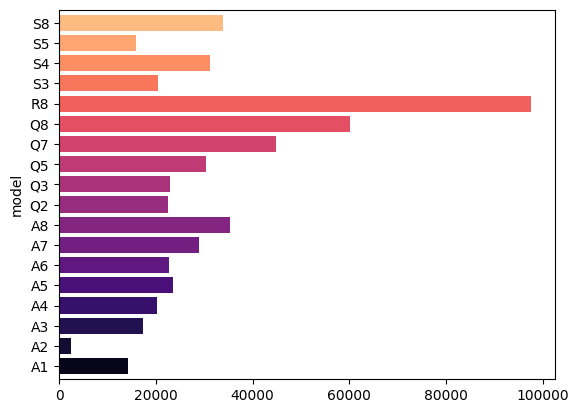

In [95]:
# 코드 12-94. 모델에 따른 중고차 평균 가격 시각화
df_audi.groupby('model')['price'].mean().plot(
    kind='barh', color=c, width=.8
)

<Axes: xlabel='year'>

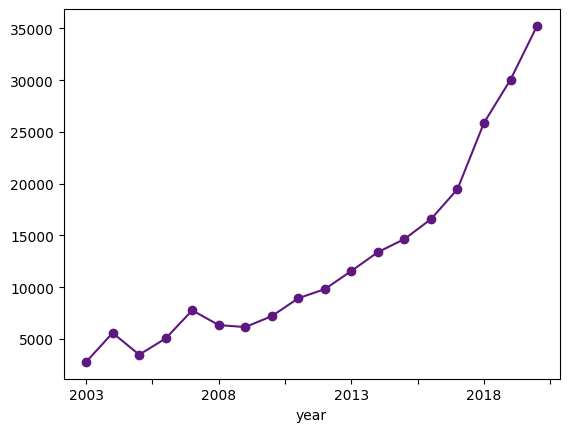

In [96]:
# 코드 12-95. 연식에 따라 중고차 평균 가격 시각화
(df_audi.astype({'year':'str'})
.groupby('year')['price'].mean()
.plot(marker='o', color=c[5])
)

In [97]:
# 코드 12-96. 아우디 모델을 분류한 그루퍼 생성
grp1 = df_audi['model'].str[0] + '-Series'
grp1

,model
0,A-Series
1,A-Series
2,A-Series
...,...
10170,A-Series
10171,Q-Series
10172,Q-Series


In [98]:
# 코드 12-97. 아우디 연식을 균등 분할한 그루퍼 생성
grp2 = (
    pd.qcut(df_audi['year'], q=3, labels=['old', 'middle', 'new'])
      .astype('str')
)
grp2

,year
0,middle
1,old
2,old
...,...
10170,new
10171,middle
10172,old


In [99]:
# 코드 12-98. 아우디 모델과 연식에 따라 중고차 가격 평균 집계하기
df_audi.groupby([grp1, grp2])['price'].mean().unstack()

year,middle,new,old
model,,,
A-Series,23154.13,30518.29,13346.65
Q-Series,29696.99,38727.65,18890.82
R-Series,117187.00,138965.00,55956.20
S-Series,33752.64,45388.00,17222.14


<Axes: xlabel='model'>

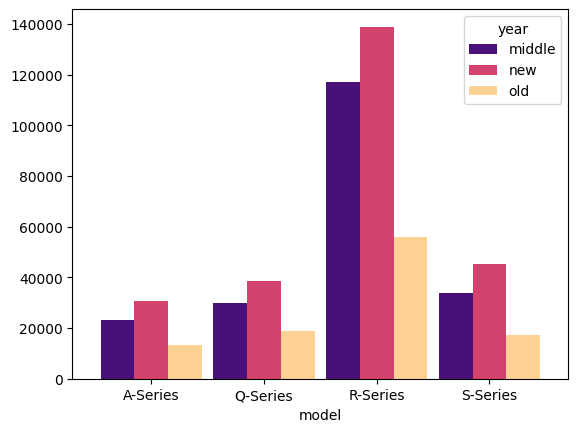

In [100]:
# 코드 12-99. 아우디 중고차 가격 집계 결과 시각화
(df_audi
 .groupby([grp1, grp2])['price'].mean().unstack()
 .plot(kind='bar', width=.9, rot=0, color=c[4::7])
)